# Preprocessing images for Blood Cell

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import csv
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from Utilities import PlotImages
from sklearn.preprocessing import LabelEncoder

## Balance Checking

ideally we want the equal amount of images for each Blood Cell type.

In [2]:
df = pd.read_csv('./Data/dataset-master/labels.csv')
df.head()

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL


In [3]:
# get rid of the first column
df = df.drop(df.columns[0],axis=1)
print(df.shape)
df.head()

(411, 2)


,Image,Category
0,0,NEUTROPHIL
1,1,NEUTROPHIL
2,2,NEUTROPHIL
3,3,NEUTROPHIL
4,4,NEUTROPHIL


In [4]:
df = df.dropna()
df.shape

(367, 2)

In [5]:
df.Category

0      NEUTROPHIL
1      NEUTROPHIL
2      NEUTROPHIL
3      NEUTROPHIL
4      NEUTROPHIL
          ...    
405    NEUTROPHIL
407    NEUTROPHIL
408    NEUTROPHIL
409    NEUTROPHIL
410    EOSINOPHIL
Name: Category, Length: 367, dtype: object

In [6]:
labels = df.Category.astype('category')
labels

0      NEUTROPHIL
1      NEUTROPHIL
2      NEUTROPHIL
3      NEUTROPHIL
4      NEUTROPHIL
          ...    
405    NEUTROPHIL
407    NEUTROPHIL
408    NEUTROPHIL
409    NEUTROPHIL
410    EOSINOPHIL
Name: Category, Length: 367, dtype: category
Categories (17, object): [BASOPHIL, EOSINOPHIL, EOSINOPHIL, EOSINOPHIL, EOSINOPHIL, LYMPHOCYTE, ..., NEUTROPHIL, NEUTROPHIL, NEUTROPHIL,BASOPHIL, NEUTROPHIL,EOSINOPHIL, NEUTROPHIL,NEUTROPHIL]

In [7]:
X = []
for label in labels:
    if label.find(", ") != -1:
        split_labels = label.split(", ")
        X.extend(split_labels)
    elif label.find(",") != -1:
        split_labels = label.split(",")
        X.extend(split_labels)
    else:
        X.append(label)
X

['NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'BASOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'MONOCYTE',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'BASOPHIL',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'NEUTROPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'NEUTROPHIL',
 'NEUTROPHIL',
 'NEU

In [8]:
labels = pd.DataFrame(X)
labels = labels.rename(columns={0:"category"})
labels.head()

,category
0,NEUTROPHIL
1,NEUTROPHIL
2,NEUTROPHIL
3,NEUTROPHIL
4,NEUTROPHIL


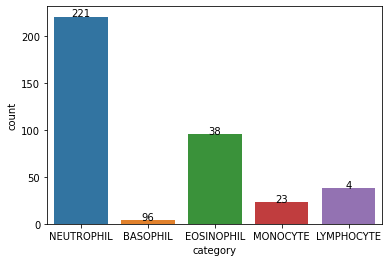

In [9]:
graph = sns.countplot(x = "category",data=labels)

# showing counts on the graph
i = 0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,
        labels.category.value_counts()[i], ha="center")
    i += 1

We can see that the classes are not balance. So we are going to do data augmentation to balance the data.

## Augmented Data are already in the dataset2-master

In [10]:
directory = './Data/dataset2-master/images/TRAIN/'

In [11]:
generator = ImageDataGenerator(rescale = 1/255)
image_generator = generator.flow_from_directory(directory,
                                               target_size=(32,32),
                                               batch_size =100,
                                               class_mode='sparse')

Found 9957 images belonging to 4 classes.


In [12]:
images, labels = image_generator.next()

In [13]:
images.shape

(100, 32, 32, 3)

In [14]:
labels.shape

(100,)

In [15]:
labels = labels.astype('int')
labels

array([0, 3, 3, 0, 1, 1, 2, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0, 3, 0, 2, 3, 3,
       3, 2, 0, 0, 0, 2, 3, 3, 1, 0, 0, 3, 1, 3, 0, 0, 3, 2, 3, 3, 0, 2,
       3, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 1, 2, 3, 2, 0,
       2, 3, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 3, 1, 2, 1, 2,
       2, 2, 3, 3, 1, 1, 0, 3, 2, 2, 2, 0])

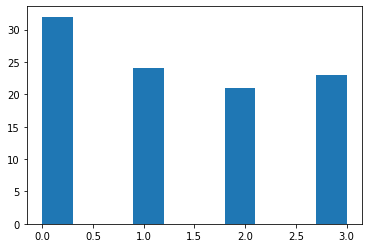

In [16]:
plt.hist(labels)
plt.show()

the data in dataset2-master are balanced

In [17]:
image_generator.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [18]:
label_names = list(image_generator.class_indices)
label_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

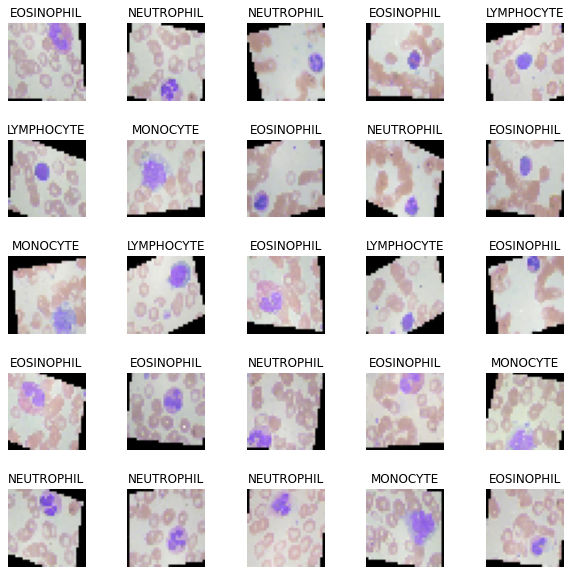

In [19]:
PlotImages(0,25,5,5,images,labels, label_names)

In [20]:
# train input for logistic regressor
X = images.reshape(100, 32*32*3)
y = labels

In [21]:
# set up data augmentation pipeline
generator = ImageDataGenerator(rescale=1/255,
                              rotation_range=360,
                              width_shift_range=0.2,
                              height_shift_range=0.2)
data_generator = generator.flow_from_directory(directory,
                                              target_size = (32,32),
                                              batch_size = 10000,
                                              class_mode='sparse',
                                              shuffle = True)

Found 9957 images belonging to 4 classes.


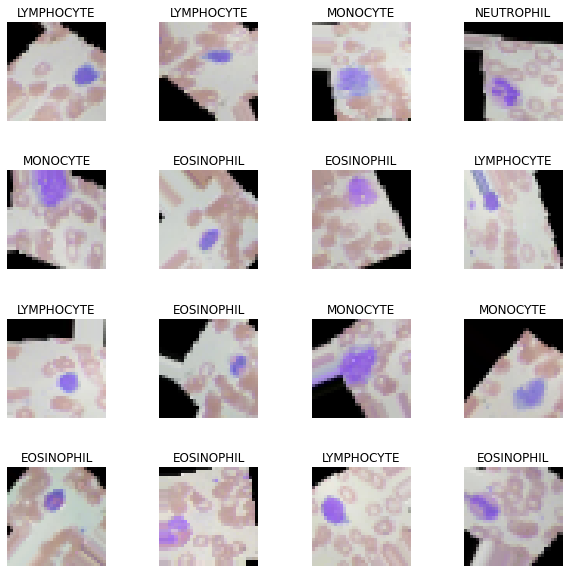

In [22]:
images, labels = data_generator.next()
labels = labels.astype('int')
PlotImages(0,16,4,4,images,labels, label_names)

In [23]:
# save preprocessed iamges and labels
np.save('images_preprocessed',images)
np.save('labels',labels)
np.save('label_names',label_names)

In [24]:
# load data
images_preprocessed = np.load('images_preprocessed.npy')
labels = np.load('labels.npy')
label_names = np.load('label_names.npy')

In [27]:
np.savez('./Data/blood_cell32', images = images, labels = labels, label_names= label_names)

In [31]:
cells = np.load('./Data/blood_cell32.npz')

In [32]:
cells.files

['images', 'labels', 'label_names']

In [33]:
images = cells['images']
images.shape

(9957, 32, 32, 3)